# Create a word embedding using gensim Word2Vec

Dataset: https://www.kaggle.com/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests?select=raw_partner_headlines.csv
<br>
We demonstrate to create a word embedding using gensim Word2Vec. This package enables us to create the word emebdding from the dataset which gather the headlines of financial news from 2009 to 2020.

In [1]:
import pandas as pd
import string
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser, ENGLISH_CONNECTOR_WORDS
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

C:\Users\hotsa\anaconda3\envs\NLP\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Load the data

In [2]:
df = pd.read_csv('raw_partner_headlines.csv')

In [3]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,2,Agilent Technologies Announces Pricing of $5……...,http://www.gurufocus.com/news/1153187/agilent-...,GuruFocus,2020-06-01 00:00:00,A
1,3,Agilent (A) Gears Up for Q2 Earnings: What's i...,http://www.zacks.com/stock/news/931205/agilent...,Zacks,2020-05-18 00:00:00,A
2,4,J.P. Morgan Asset Management Announces Liquida...,http://www.gurufocus.com/news/1138923/jp-morga...,GuruFocus,2020-05-15 00:00:00,A
3,5,"Pershing Square Capital Management, L.P. Buys ...",http://www.gurufocus.com/news/1138704/pershing...,GuruFocus,2020-05-15 00:00:00,A
4,6,Agilent Awards Trilogy Sciences with a Golden ...,http://www.gurufocus.com/news/1134012/agilent-...,GuruFocus,2020-05-12 00:00:00,A


We collect the data from the headlines only.

In [4]:
df = df[['headline']]

In [5]:
def clean_doc(data):
    data = data.str.lower() # change to lower capital
    data = data.str.replace(r'[\d]',' ') # remove digits
    data = data.str.replace('[{}]'.format(string.punctuation), '') # remove punctuation
    data = data.fillna('') # fill 'nan' with ''
    return data

In [6]:
df['headline'] = clean_doc(df['headline'])

In [7]:
temp = df['headline'].tolist()
doctext = [word_tokenize(doc) for doc in temp] # Tokenize the document

Extract phases from the document

In [8]:
phrases = Phrases(doctext, min_count=1, threshold=1, connector_words=ENGLISH_CONNECTOR_WORDS)
bigram = Phraser(phrases)
doctext = list(bigram[doctext])

# Create the word embedding from Word2Vec

In [9]:
model = Word2Vec(sentences=doctext, vector_size=200, window=5, min_count=2, workers=3)

# Find the similar words from word embedding

In [10]:
def similar_wordcloud(word):
    # finding similar words from word embedding
    similar_word = model.wv.most_similar(word)
    similar_word = [w[0] for w in similar_word]
    text = " ".join(similar_word)
    wordcloud = WordCloud(collocations=False).generate(text)
    plt.figure(figsize=(10,5))
    plt.title(word, fontsize=24)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

<b> asset_management

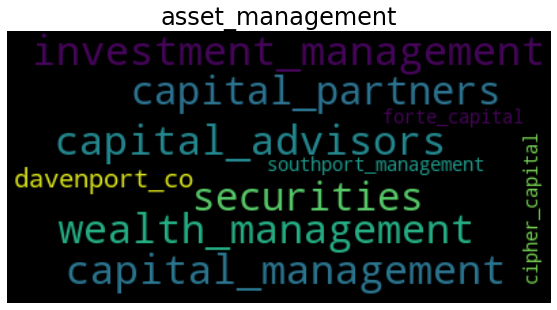

In [11]:
similar_wordcloud('asset_management')

<b> stock

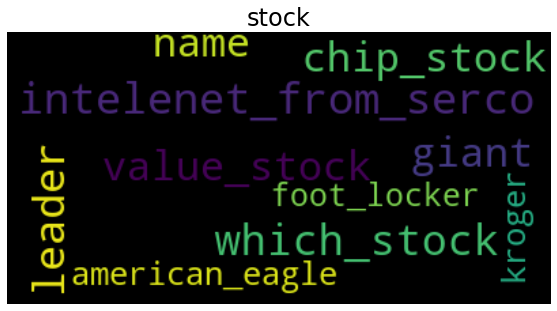

In [12]:
similar_wordcloud('stock')

<b> bond

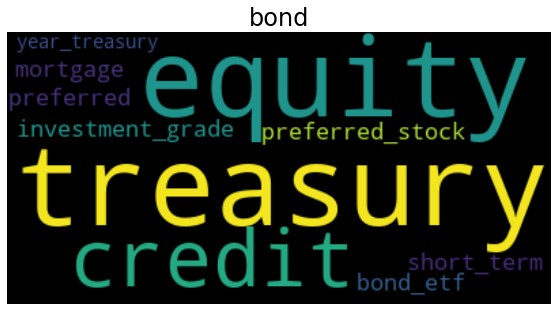

In [13]:
similar_wordcloud('bond')

<b> fund

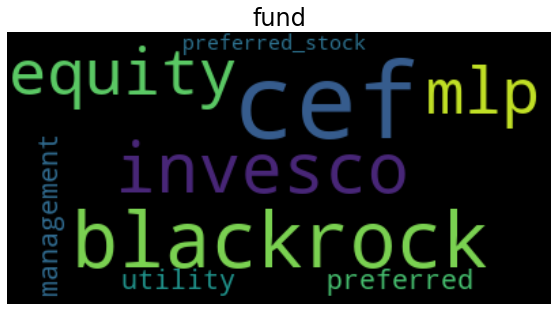

In [14]:
similar_wordcloud('fund')